# Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data cleaning

In [2]:
#First, load in both .csv files.
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

In [3]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
#Merge both .csv files on "id" column
df = survey.merge(steps, on="id")

In [6]:
#Create a "mean_steps" column, consisting of the mean steps per participant. Calculated per row.
df["mean_steps"] = df.mean(axis=1)

#Rounding up the mean steps.
df["mean_steps"] = df['mean_steps'].round()

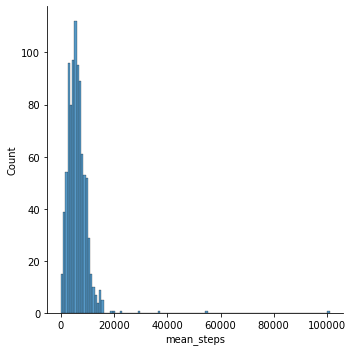

In [7]:
#Plot distplot to show outliers
sns.displot(df["mean_steps"], kde=False) 

In [8]:
#Cleaning up the data by removing outliers of over 17.500 mean steps per day.
df = df[(df["mean_steps"] < 17500)]

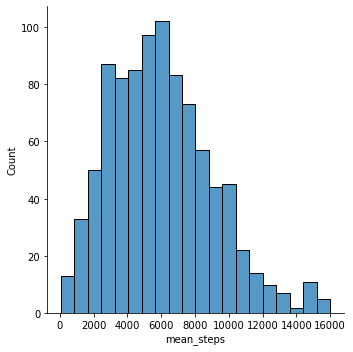

In [9]:
#Check if outliers have been removed.
sns.displot(df["mean_steps"], kde=False) 

In [10]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9907.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5520.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8032.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4866.0


# Feature Engineering
A better way to indicate healthy weight is to calculate the bmi by dividing weight with the square root of height.

In [11]:
df["height_m"] = df["height"] / 100
df["bmi"] = (df["weight"] / (df["height_m"] * df["height_m"]))

df = df[(df['bmi'] < 40) & (df["bmi"] > 18)]

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_m,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9907.0,1.78,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5520.0,1.80,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8032.0,1.80,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917.0,1.78,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4866.0,1.67,21.872423


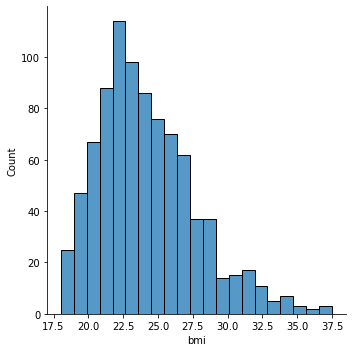

In [12]:
sns.displot(df["bmi"], kde=False)
plt.show()

# Exploratory data analysis

Text(0.5, 1.0, 'Mean steps per participant')

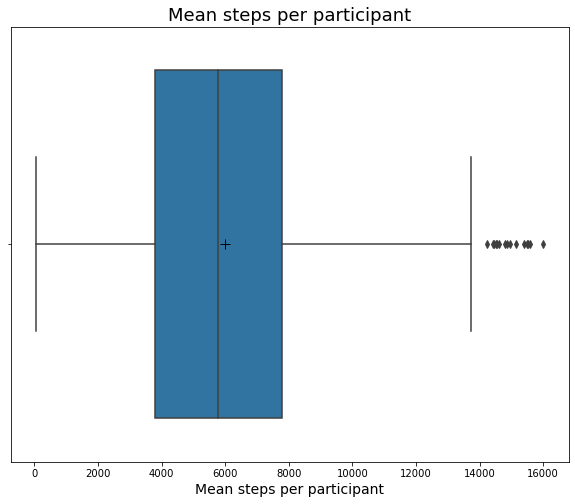

In [13]:
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(x='mean_steps',
            
            data=df,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel("Mean steps per participant", size=14)
plt.title("Mean steps per participant", size=18)

<AxesSubplot:xlabel='mean_steps', ylabel='Density'>

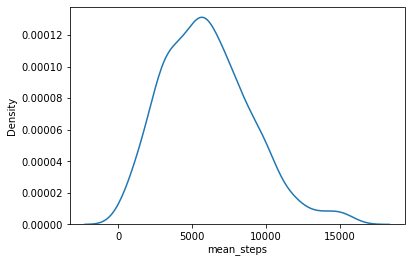

In [14]:
sns.kdeplot(x = "mean_steps", data = df)

In [15]:
mean = df['mean_steps'].mean()
print("The participants have taken " + str(mean) + " steps on average per day.")

median = df["mean_steps"].median()
print("The median is " + str(median) + " steps.")

variance = df["mean_steps"].var()
print("The variance is " + str(variance) + " steps.")

The participants have taken 6009.988687782806 steps on average per day.
The median is 5782.0 steps.
The variance is 8978776.006666902 steps.


### Description of distribution
Looking at the density plot shows that the data has a central density with one peak. The outliers around the 15.000 steps a day mark make the plot right-skewed. This means that the mean is higher than the median, as can be seen in the plot below.

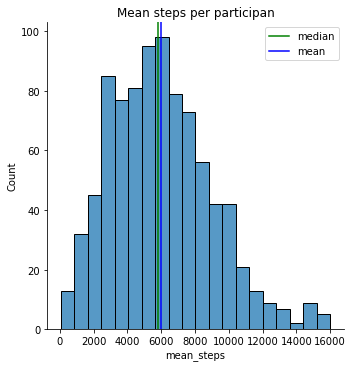

In [16]:
mean_size = df['mean_steps'].mean()
median_size = df['mean_steps'].median()

sns.displot(df["mean_steps"], kde=False)
plt.title('Mean steps per participan')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

<AxesSubplot:xlabel='mean_steps'>

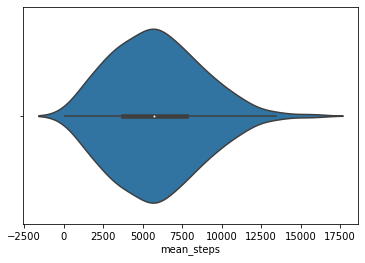

In [17]:
dfMale = df[df['gender'] == "Male"]
dfFemale = df[df['gender'] == "Female"]

sns.violinplot(x = "mean_steps", data = dfMale)


<AxesSubplot:xlabel='mean_steps'>

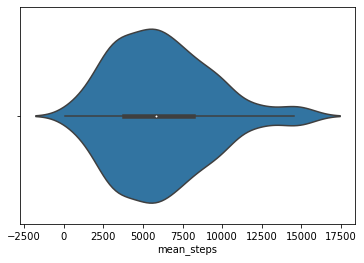

In [18]:
sns.violinplot(x = "mean_steps", data = dfFemale)

When distinguishing the data between genders, it can be seen that on average, women take more steps per day. The outliers are all from women and the data shows a more shaped distribution towards the right. 

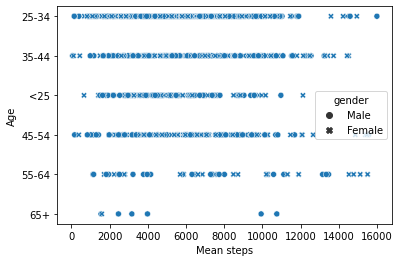

In [19]:
sns.scatterplot(x='mean_steps', y='age', style='gender', data=df)
plt.xlabel('Mean steps')
plt.ylabel('Age')
plt.show()

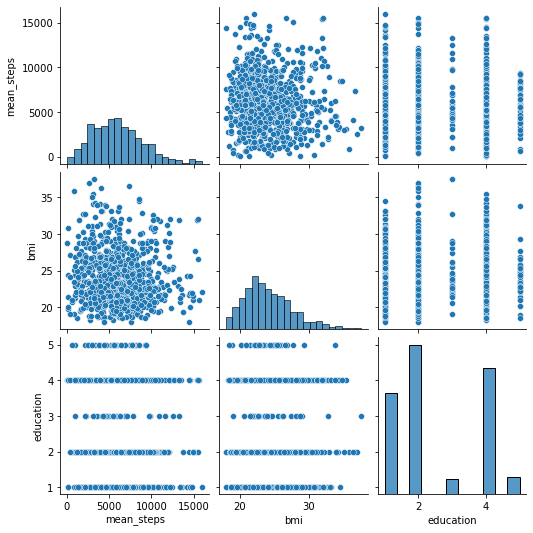

In [20]:
dfScatter = df[['mean_steps', 'bmi', 'education']]

sns.pairplot(dfScatter)
plt.show()

In [21]:
corr = df[['mean_steps', 'bmi', 'education']].corr()
corr

,mean_steps,bmi,education
mean_steps,1.000000,-0.056266,0.004033
bmi,-0.056266,1.000000,0.057993
education,0.004033,0.057993,1.000000


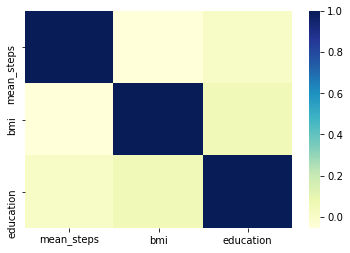

In [22]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

# Predictive Model

Linear regression can be used to predict the relation between two different variables. A linear regression model consists of an independent and dependent variable. The independent variable is not affected by changes of the dependent variable, whereas the dependent variable is affected by changes of the indepedent variable. By using a formula, the change of the dependent variable can be predicted based on the input of the independent variable.